In [96]:
import numpy as np

def dx(max,min):
  return max-min


def x_c(min, dx, C):
  return min+ dx*(C/255)

def x_c_inverse(min, dx, x_c):
  return np.round((x_c-min)*255/dx)


def chaos_algorithm(a, pixel_val, iter_num, max, min):
  if pixel_val > max:
    pixel_val = pixel_val - dx(max, min)
  if pixel_val > max:
    pixel_val = pixel_val - dx(max, min)  
  for i in range(iter_num):
    print(pixel_val)
    pixel_val = a*pixel_val*(1-pixel_val)
  return pixel_val




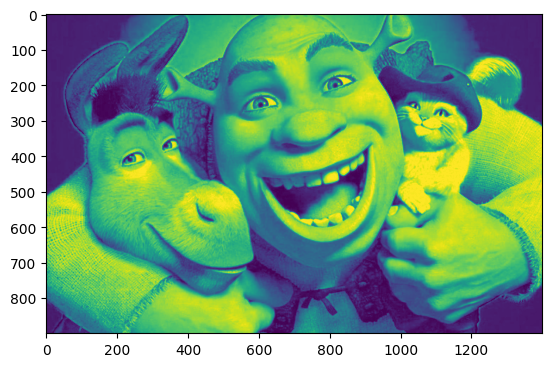

[18 18 18 18]
[0.15717527 0.15717527 0.15717527 0.15717527] 0.15717527058823527
[0.34465738 0.95750529 0.11412903 0.28104985] 0.13637409832514924


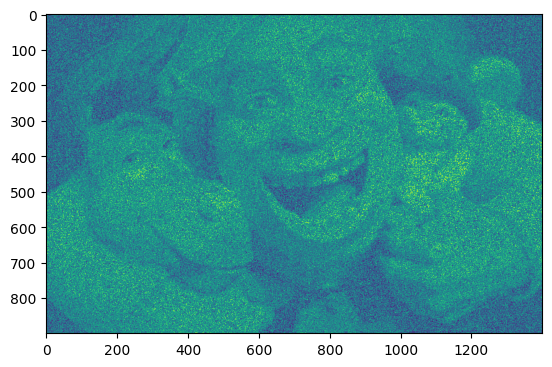

In [78]:
import numpy as np
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
import random


image = io.imread("../resources/shrek.jpg")


plt.imshow(image[..., 0])
plt.show()

y, x, z = image.shape

image = image.reshape(x*y, 3)

red = image[..., 0]
print(red[-5: -1])


min = 0.095062
max = 0.975
a = 3.9
iter_num = 10

red_norm = x_c(min, dx(max, min), red)

print(red_norm[-5:-1], red_norm[-1])

red_n = np.zeros(red_norm.shape)
lista = []
for i in range(red.shape[0]):    
    temp = chaos_algorithm(a, red_n[i-1], iter_num, max, min)+red_norm[i]
    red_n[i] = temp if np.around(temp, decimals=3)<=max else temp-dx(max,min)
    lista.append(red_n[i])
    


red_new = x_c_inverse(min, dx(max, min), red_n)


print(red_n[-5:-1], red_n[-1])
#print(lista.index(-np.inf))

import matplotlib.pyplot as plt
#red_new = x_c_inverse(min,dx(max, min), red_new)
red_new = red_new.reshape((y,x))

plt.imshow(red_new)
plt.show()

[0.34465738 0.95750529 0.11412903 0.28104985] 0.13637409832514924
[0.15717527 0.15717527 0.15717527 0.15717527] 0.15717527058823533
[18. 18. 18. 18.]
0.18007742697196394


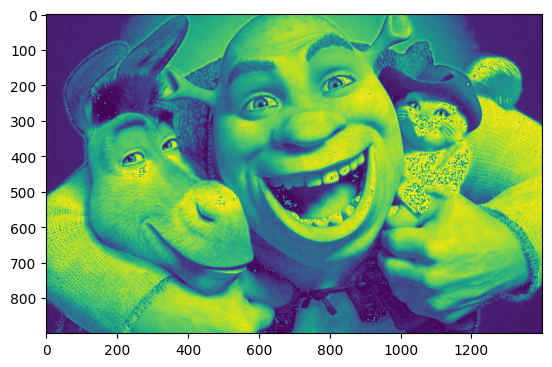

In [79]:
#red_new = red_new.reshape(x*y, 1)



#red_n = x_c(min, dx(max, min), red_new)

print(red_n[-5:-1], red_n[-1])
 
red_dec = np.zeros(red_n.shape[0])
for i in range(red_n.shape[0]):
    temp = red_n[-i] - chaos_algorithm(a, red_n[-i-1], iter_num, max, min)
    red_dec[-i] =temp if temp >=min else temp + dx(max,min)



print(red_dec[-5:-1], red_dec[-1])
red_d = x_c_inverse(min, dx(max, min), red_dec)

print(red_d[-5:-1])

red_d = red_d.reshape((y,x))
red_n = red_n.reshape((y,x))
red_norm = red_norm.reshape((y,x))
red_dec = red_dec.reshape((y,x))
red  = red.reshape((y,x))

print(red_n[108,362])



plt.imshow(red_d)
plt.show()

In [88]:
a, b = (400, 1105)
print(red_dec[a, b])
print(red_norm[a, b])
print(red_n[a, b])
print(red_d[a, b])
print(red[a, b])

0.09506200000000009
0.975
0.765440497094423
0.0
255


In [102]:
t = red_n[a,b] - chaos_algorithm(3.9, red_n[a,b], iter_num, max, min)
print(red_n[a,b])
print(chaos_algorithm(3.9, red_n[a,b], iter_num, max, min))
print("-------------------------")
print(t)
print(np.around(t, decimals=6))
print(3.9*0.765*(1-0.765))
print(a)

0.765440497094423
0.7002112357588359
0.8186702981960872
0.5789520400857058
0.9506896439285899
0.1828274949365313
0.5826662479238793
0.948348536671332
0.1910359996922335
0.6027108614039076
0.765440497094423
0.765440497094423
0.7002112357588359
0.8186702981960872
0.5789520400857058
0.9506896439285899
0.1828274949365313
0.5826662479238793
0.948348536671332
0.1910359996922335
0.6027108614039076
0.9338568679037023
-------------------------
-0.1684163708092793
-0.168416
0.7011224999999999
400


In [81]:

x = np.nonzero(red_d-red.reshape(red_dec.shape))

In [82]:
print(x)

(array([  0, 104, 114, ..., 899, 899, 899], dtype=int64), array([   0,  151,  134, ...,  647, 1212, 1213], dtype=int64))


[159. 199.  26. 145.]


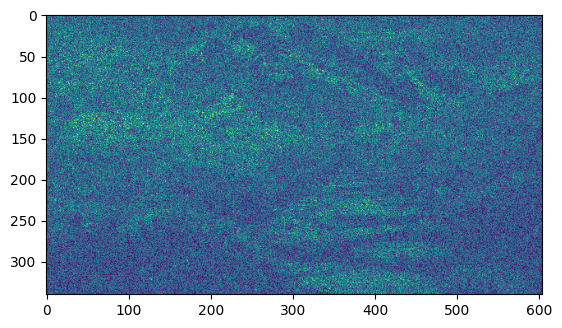

In [14]:
red_new = red_new.reshape(340*604, 1)


min = 0.095062
max = 0.95
a = 3.9
val = 0
iter_num = 20

red_norm = x_c(min, dx(max, min), red_new)


red_dec = np.zeros(red_norm.shape[0])
for i in range(red_norm.shape[0]):
    temp = red_norm[-i] - chaos_algorithm(a, red_norm[-i-1], iter_num, max, min)
    red_dec[-i] = temp if temp>min else temp + dx(max,min)

red_dec = x_c_inverse(min, dx(max, min), red_dec)

print(red_dec[-5:-1])

red_dec = red_dec.reshape(340, 604)





plt.imshow(red_dec)
plt.show()
